# Prediciting Housing Prices Using Advanced Regression Techniques

This is a data science project created for the House Prices: Advanced Regression Techniques compeititon on Kaggle. https://www.kaggle.com/c/house-prices-advanced-regression-techniques

The goal of the competition is to use the various features in the given dataset to build a model that accurately predicts the sale price of each home.

The resulting predictions are evaluated based on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price.

A train and test data set are provided, each with 1460 entries and 80 features (test set has 79 since SalePrice is not provided). 

Through my investigation of the dataset I perform exploratory data analysis, data cleaning, feature engineering and build multiple regression models to predict house prices based on the various attributes in the dataset. 

Finished in top 16% overall.

# Data Aquisition


In [493]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [494]:
train_df = pd.read_csv('housing_prices_train.csv')
train_df.set_index('Id', inplace = True)
test_df = pd.read_csv('test.csv')
test_df.set_index('Id', inplace = True)

In [495]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [496]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


The following chart provides a description for each feature in the dataset

Column Name | Meaning
 --- | ---
SalePrice | the property's sale price in dollars
MSSubClass|The building class
MSZoning| The general zoning classification
LotFrontage| Linear feet of street connected to property
LotArea| Lot size in square feet
Street| Type of road access
Alley| Type of alley access
LotShape| General shape of property
LandContour| Flatness of the property
Utilities| Type of utilities available
LotConfig| Lot configuration
LandSlope|Slope of property
Neighborhood| Physical locations within Ames city limits
Condition1| Proximity to main road or railroad
Condition2| Proximity to main road or railroad (if a second is present)
BldgType| Type of dwelling
HouseStyle| Style of dwelling
OverallQual| Overall material and finish quality
OverallCond| Overall condition rating
YearBuilt| Original construction date
YearRemodAdd| Remodel date
RoofStyle| Type of roof
RoofMatl| Roof material
Exterior1st| Exterior covering on house
Exterior2nd| Exterior covering on house (if more than one material)
MasVnrType| Masonry veneer type
MasVnrArea| Masonry veneer area in square feet
ExterQual| Exterior material quality
ExterCond| Present condition of the material on the exterior
Foundation| Type of foundation
BsmtQual| Height of the basement
BsmtCond| General condition of the basement
BsmtExposure| Walkout or garden level basement walls
BsmtFinType1| Quality of basement finished area
BsmtFinSF1| Type 1 finished square feet
BsmtFinType2| Quality of second finished area (if present)
BsmtFinSF2| Type 2 finished square feet
BsmtUnfSF| Unfinished square feet of basement area
TotalBsmtSF| Total square feet of basement area
Heating| Type of heating
HeatingQC| Heating quality and condition
CentralAir| Central air conditioning
Electrical| Electrical system
1stFlrSF| First Floor square feet
2ndFlrSF| Second floor square feet
LowQualFinSF| Low quality finished square feet (all floors)
GrLivArea| Above grade (ground) living area square feet
BsmtFullBath| Basement full bathrooms
BsmtHalfBath| Basement half bathrooms
FullBath| Full bathrooms above grade
HalfBath| Half baths above grade
Bedroom| Number of bedrooms above basement level
Kitchen| Number of kitchens
KitchenQual| Kitchen quality
TotRmsAbvGrd| Total rooms above grade (does not include bathrooms)
Functional| Home functionality rating
Fireplaces| Number of fireplaces
FireplaceQu| Fireplace quality
GarageType| Garage location
GarageYrBlt| Year garage was built
GarageFinish| Interior finish of the garage
GarageCars| Size of garage in car capacity
GarageArea| Size of garage in square feet
GarageQual| Garage quality
GarageCond| Garage condition
PavedDrive| Paved driveway
WoodDeckSF| Wood deck area in square feet
OpenPorchSF| Open porch area in square feet
EnclosedPorch| Enclosed porch area in square feet
3SsnPorch| Three season porch area in square feet
ScreenPorch| Screen porch area in square feet
PoolArea| Pool area in square feet
PoolQC| Pool quality
Fence| Fence quality
MiscFeature| Miscellaneous feature not covered in other categories
MiscVal| $ Value of miscellaneous feature
MoSold| Month Sold
YrSold| Year Sold

# Exploratory Data Analysis

I begin by exploring the target variable, SalePrice. I will explore its distribution, central tendency, dispersion and correlation with the various features.

In [497]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The target variable, SalePrice, does not appear to be normally distributed. The distribution of SalePrice is skewed rightward, as there are very high priced homes that cause this skew. I will further explore this skewness in the feature engineering stage.

Text(0.5,1,u'SalePrice Distribution')

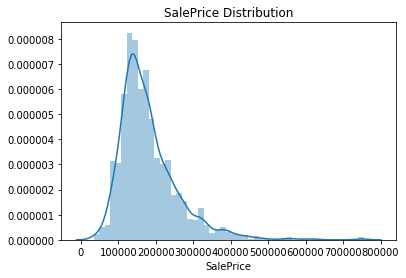

In [498]:
sns.distplot(train_df['SalePrice']).set_title('SalePrice Distribution')

There appears to be many outliers in our target variable, approximately 59. These high priced homes are clearly causing the rightward skew of the distribution. These outliers could become problematic in the modeling stage and I must consider removing them or normalizing the data.

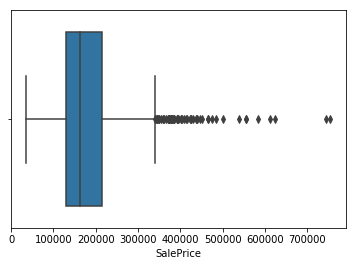

In [499]:
sns.boxplot(x = 'SalePrice', data = train_df)

There are 59 outliers in SalePrice


Text(0.5,1,u'Outlier Distribution')

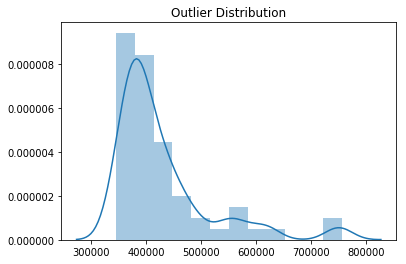

In [500]:
def outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    count = 0
    outlier = []
    if (Q1 - 3*IQR) < 0:
        x = -(Q1 - 3*IQR)
        Q1 = 0
        Q3 = Q3 - x
        
    for d in data:
        if d >= (Q3 + 3*IQR) or d < (Q1 - 3*IQR):
            count+=1
            outlier = outlier + [d]
    return (count, outlier)

num_out, out_list = outliers(train_df['SalePrice'])


print("There are {} outliers in SalePrice".format(num_out))

sns.distplot(out_list).set_title("Outlier Distribution")

I now explore the correlations between SalePrice and the various numerical features

In [501]:
corr = train_df.corr()['SalePrice'].sort_values()
print(corr)

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64


In [502]:
print("Most Positive Correlations", corr.tail(5))
print("Most Negative Correlations", corr.head(5))

('Most Positive Correlations', GarageArea     0.623431
GarageCars     0.640409
GrLivArea      0.708624
OverallQual    0.790982
SalePrice      1.000000
Name: SalePrice, dtype: float64)
('Most Negative Correlations', KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
Name: SalePrice, dtype: float64)


While the negative correlations are relatively weak, there are several strong positive correlations associated with our target variable. I will now explore those correlations with R values greater than 0.5. 

In [503]:
corr_df = pd.DataFrame()
for index in corr.index.values:
    if corr.loc[index] > 0.5:
        corr_df[index] = train_df[index]
        
corr_df.columns

Index([u'YearRemodAdd', u'YearBuilt', u'TotRmsAbvGrd', u'FullBath',
       u'1stFlrSF', u'TotalBsmtSF', u'GarageArea', u'GarageCars', u'GrLivArea',
       u'OverallQual', u'SalePrice'],
      dtype='object')

I start by exporing the strongest correlation; OverallQual.

OverallQual is ordinal data, it is a hierarchical ranking with no distance between values implied. Therefore we can only use median and mode for measures of central tendency. The ranking goes from 1(lowest) to 10(highest).

Text(0.5,1,u'OverallQual Count')

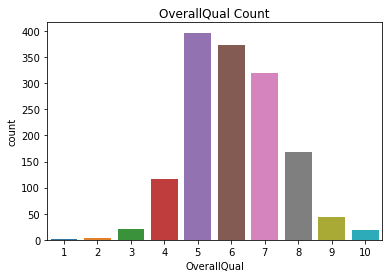

In [504]:
sns.countplot(train_df['OverallQual']).set_title('OverallQual Count')

In [505]:
mode = train_df['OverallQual'].mode()[0]
median = train_df['OverallQual'].median()
print("Median of OverallQual {}".format(median))
print("Mode of OverallQual {}".format(mode))

for idx in train_df['OverallQual'].value_counts().sort_index().index:
    percentage = (float(OverallQuall_count.loc[idx])/len(train_df.index))*100
    print("% of homes with OverallQuall {}: {}".format(idx, percentage))

Median of OverallQual 6.0
Mode of OverallQual 5
% of homes with OverallQuall 1: 0.13698630137
% of homes with OverallQuall 2: 0.205479452055
% of homes with OverallQuall 3: 1.3698630137
% of homes with OverallQuall 4: 7.94520547945
% of homes with OverallQuall 5: 27.1917808219
% of homes with OverallQuall 6: 25.6164383562
% of homes with OverallQuall 7: 21.8493150685
% of homes with OverallQuall 8: 11.5068493151
% of homes with OverallQuall 9: 2.94520547945
% of homes with OverallQuall 10: 1.23287671233


The distribution of OverallQual appears to be fairly normally distributed. The median is 6, therefore there is a slight rightward skew towards higher OverallQual.

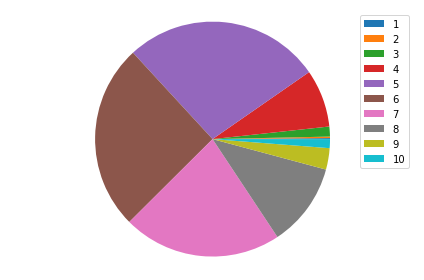

In [506]:
labels = list(train_df['OverallQual'].value_counts().sort_index().index)
sizes = list(train_df['OverallQual'].value_counts().sort_index().values)

patches, texts = plt.pie(sizes)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

Text(0.5,1,u'SalePrice for OverallQual')

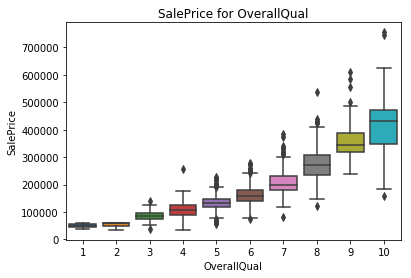

In [507]:
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = train_df).set_title('SalePrice for OverallQual')

Now onto the second most correlated variable, GrLivArea

In [508]:
train_df['GrLivArea'].describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

The distribution of GrLivArea also appears to be skewed rightward, as there are a few homes with a large GrLivArea that skew the distribution.

Text(0.5,1,u'Distribution of GrLivArea')

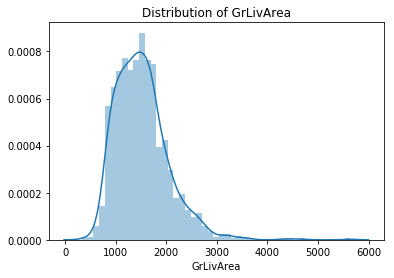

In [509]:
sns.distplot(train_df['GrLivArea']).set_title('Distribution of GrLivArea')

In [510]:
num_out, out_list = outliers(train_df['GrLivArea'])
print(num_out, out_list)

(20, [2945, 3222, 3608, 3112, 3493, 2978, 3228, 4676, 3194, 3395, 4316, 3279, 3140, 3082, 3627, 3086, 4476, 3447, 5642, 3238])


The two outliers in the plot below, the points that have a low sale price but high GrLiveArea are worth a second look. These outliers could strongly affect our model in the future.

Text(0.5,1,u'GrLivArea vs. SalePrice')

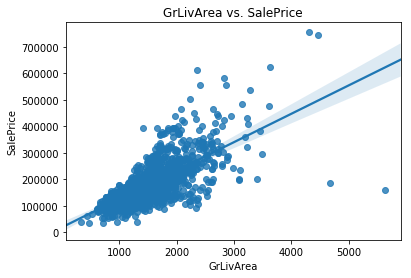

In [511]:
sns.regplot(x = 'GrLivArea', y = 'SalePrice', data = train_df).set_title('GrLivArea vs. SalePrice')

Upon analyzing the correlation heatmap for our ten variables with R values greater than 0.5, the issue of multicolinearity arises. Features such as GarageCars and GarageArea appear to be highly correlated. This makes sense since a greater GarageArea coincides with more GarageCars (and vice versa). Other highly correlated varibles include 1stFlrSF with TotalBsmtSF and TotRmsAbvGrd with GrLivArea. This is an issue I will confront in the feature engineering phase of the project.

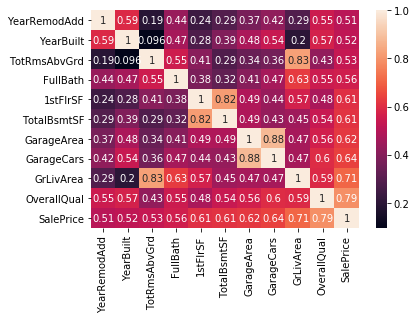

In [512]:
sns.heatmap(corr_df.corr(), annot=True)

I continue my exploratory analysis with the remaining highly correlated features.

In [513]:
train_df['GarageCars'].value_counts().sort_index()

0     81
1    369
2    824
3    181
4      5
Name: GarageCars, dtype: int64

Text(0.5,1,u'GarageCars Count')

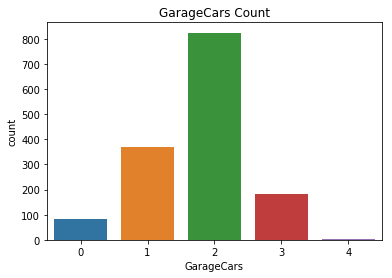

In [514]:
sns.countplot(train_df['GarageCars']).set_title('GarageCars Count')

Text(0.5,1,u'GarageCars vs. SalePrice')

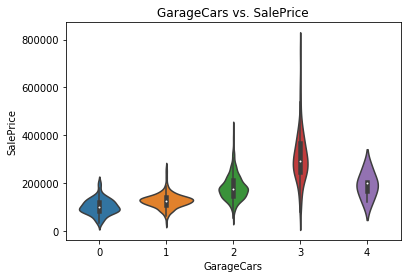

In [515]:
sns.violinplot(x = 'GarageCars', y = 'SalePrice', data = train_df).set_title('GarageCars vs. SalePrice')

In [516]:
train_df['TotalBsmtSF'].describe()

count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

Text(0.5,1,u'Distribution of TotalBsmtSF')

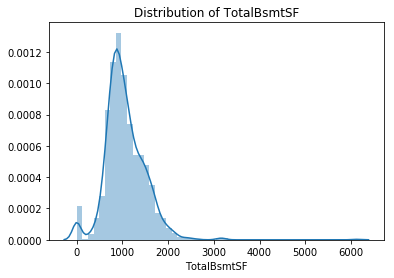

In [517]:
sns.distplot(train_df['TotalBsmtSF']).set_title('Distribution of TotalBsmtSF')

Text(0.5,1,u'TotalBsmtSF vs. SalePrice')

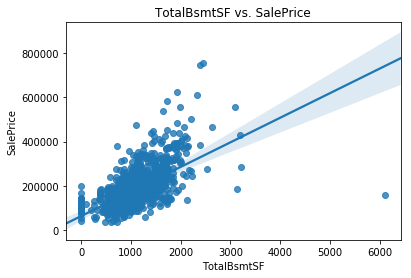

In [518]:
sns.regplot(x = 'TotalBsmtSF', y = 'SalePrice', data = train_df).set_title('TotalBsmtSF vs. SalePrice')

In [519]:
train_df['FullBath'].value_counts().sort_index()


0      9
1    650
2    768
3     33
Name: FullBath, dtype: int64

Text(0.5,1,u'FullBath count')

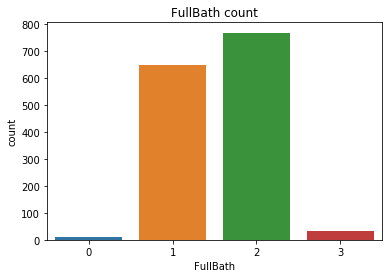

In [520]:
sns.countplot(train_df['FullBath']).set_title('FullBath count')

Text(0.5,1,u'SalePrice for Fullbath')

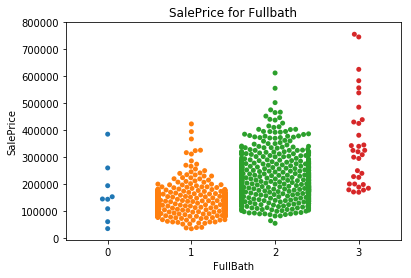

In [521]:
sns.swarmplot(x='FullBath', y = 'SalePrice', data = train_df).set_title('SalePrice for Fullbath')

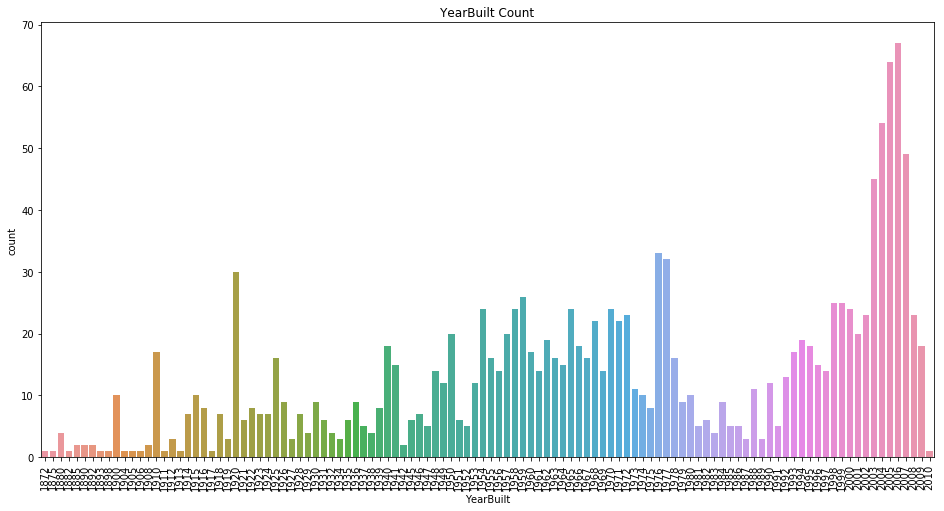

In [522]:
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.countplot(train_df['YearBuilt']).set_title('YearBuilt Count')
plt.xticks(rotation=90);

Text(0.5,1,u'YearBuilt vs. SalePrice')

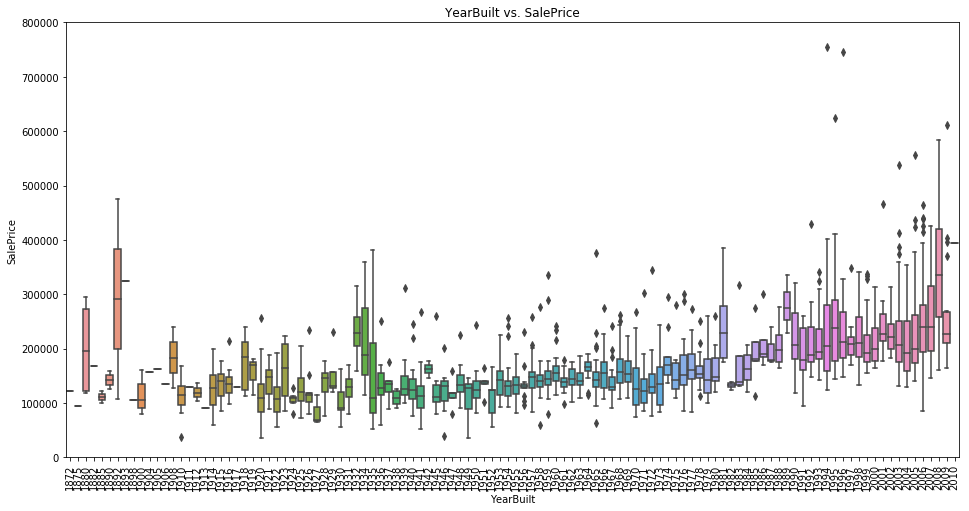

In [523]:
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='YearBuilt', y="SalePrice", data=train_df)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);
ax.set_title('YearBuilt vs. SalePrice')

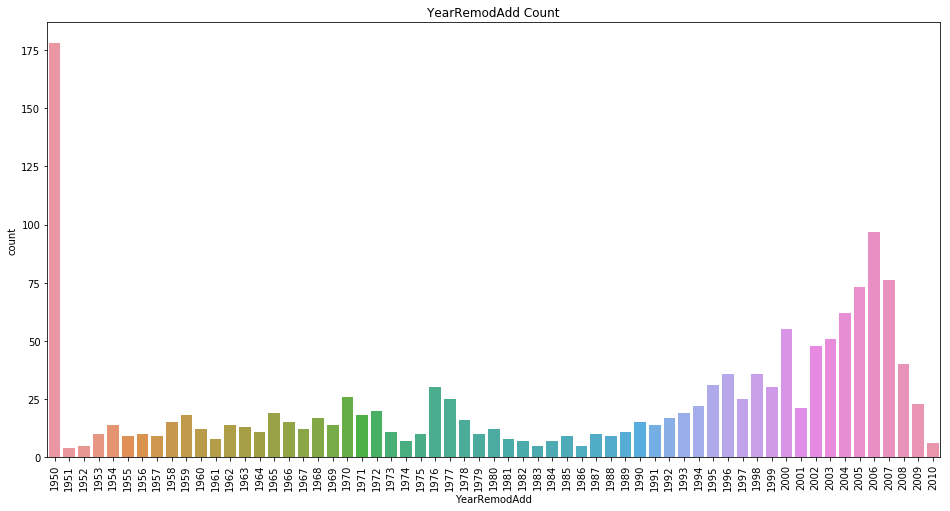

In [524]:
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.countplot(train_df['YearRemodAdd']).set_title('YearRemodAdd Count')
plt.xticks(rotation=90);


Text(0.5,1,u'YearRemodAdd vs. SalePrice')

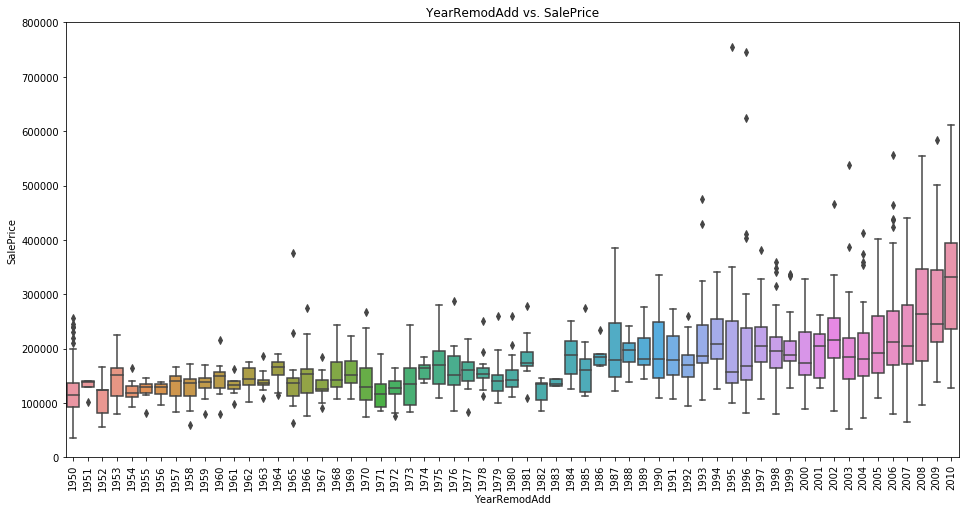

In [525]:
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='YearRemodAdd', y="SalePrice", data=train_df)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);
ax.set_title('YearRemodAdd vs. SalePrice')

# Feature Engineering

In [526]:
train_df.reset_index(inplace = True)
test_df.reset_index(inplace = True)

ntrain = train_df.shape[0]
ntest = test_df.shape[0]

df = pd.concat((train_df, test_df), sort = True).reset_index(drop=True)
df.drop(['SalePrice'], axis = 1, inplace = True)

In [527]:
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [528]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

### Converting Int/Float Categorical Variables to Strings

MSSubclass, OverallCond, YrSold, MoSold, and GarageYrBlt are all categorical variables that currently are int or float type. I will convert each variable to a string type (Ranking/Years as strings). I will change months from 1-12 to Jan-Dec for convenience.

In [529]:
def num_to_str(row, col):
    return str(row[col])

df['MSSubClass'] = df.apply(lambda row: num_to_str(row, 'MSSubClass'), axis = 1)
df['OverallCond'] = df.apply(lambda row: num_to_str(row, 'OverallCond'), axis = 1)
df['YrSold'] = df.apply(lambda row: num_to_str(row, 'YrSold'), axis = 1)
df['GarageYrBlt'] = df.apply(lambda row: num_to_str(row, 'GarageYrBlt'),axis=1)

In [530]:
month_list = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

def clean_month(row):
    month = row['MoSold']
    indx = int(month) -1
    return month_list[indx] 

df['MoSold'] = df.apply(lambda row: clean_month(row), axis = 1)

### Fixing Null Columns

In [531]:
def null_col(data):
    print("Null Columns \n")
    null_cols = 0
    for col in data:
        total_null = data[col].isnull().sum().sum()
        total_length = len(data.index)
        percent_null = (float(total_null)/total_length)*100
        if total_null > 0:
            null_cols+=1
            print("{} is {}% null".format(col, percent_null))
    print("\n{} columns have null values".format(null_cols))
    
null_col(df)

Null Columns 

Alley is 93.2168550874% null
BsmtCond is 2.80918122645% null
BsmtExposure is 2.80918122645% null
BsmtFinSF1 is 0.0342583076396% null
BsmtFinSF2 is 0.0342583076396% null
BsmtFinType1 is 2.70640630353% null
BsmtFinType2 is 2.74066461117% null
BsmtFullBath is 0.0685166152792% null
BsmtHalfBath is 0.0685166152792% null
BsmtQual is 2.77492291881% null
BsmtUnfSF is 0.0342583076396% null
Electrical is 0.0342583076396% null
Exterior1st is 0.0342583076396% null
Exterior2nd is 0.0342583076396% null
Fence is 80.4385063378% null
FireplaceQu is 48.6467968482% null
Functional is 0.0685166152792% null
GarageArea is 0.0342583076396% null
GarageCars is 0.0342583076396% null
GarageCond is 5.4470709147% null
GarageFinish is 5.4470709147% null
GarageQual is 5.4470709147% null
GarageType is 5.37855429942% null
KitchenQual is 0.0342583076396% null
LotFrontage is 16.6495375128% null
MSZoning is 0.137033230558% null
MasVnrArea is 0.787941075711% null
MasVnrType is 0.82219938335% null
MiscFeatur

Alley, MasVnrType, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType,
GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature all have NA values that indicate a categorical value of none.

In [532]:
col_list = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu',
'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'GarageYrBlt']

for col in col_list:
    df[col].fillna(value = 'None', inplace = True)

BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath, BsmtUnfSF, MasVnrArea, GarageCars, TotalBsmtSF, GarageArea are all
numerical variables in which NA indicates that the house lacks the respective feature, therefore the null values will
be filled with 0. 

In [533]:
col_list2 = ['BsmtFinSF1','BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath','BsmtUnfSF', 'MasVnrArea','GarageCars',
'TotalBsmtSF', 'GarageArea']

for col in col_list2:
    df[col].fillna(value = 0, inplace = True)

Exterior1st, Exterior2nd, Functional, Electrical, KitchenQual, MSZoning, SaleType, Utilities are all categorical variables in which there is no option for None. The NA indicates that the respective feature type is not known, therefore, I will fill the NA values with the mode of the feature or most commonly occuring instance of the feature (mode).

In [534]:
col_list3 = ['Exterior1st', 'Exterior2nd', 'Functional', 'Electrical', 'KitchenQual', 'MSZoning', 'SaleType', 'Utilities']

for col in col_list2:
    df[col].fillna(df[col].mode()[0], inplace = True) 

Lot Frontage is a numerical variable that refers to the linear feet of street connected to the property. While NA could be filled with the mode of the entire feature set, it makes more sense to substitute the median Lot Frontage of the homes respective neighborhood, since lotfrontage is usually uniform across a neighborhood (More so than the enitre datatset). 

In [535]:
df['LotFrontage'].fillna(value = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median())), inplace = True)

### Combining Redundant Features

TotalBsmtSF, 1stFlrSF, and 2ndFlrSF can all be combined into one feature, TotalSF.

In [536]:
df['TotalSF'] = df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF']
df.drop(['1stFlrSF', '2ndFlrSF', 'TotalBsmtSF'], axis = 1, inplace = True)

###  Dropping Redundant Columns

There is clear multicolinearity in the dataset, especially among these important variables as multiple features appear to be highly correlated with eachother. As a result I will remove one of these features from each pair, as they are redundant and will only increase the standard errors of the coefficients which could induce overfitting upon builidng a regression model.

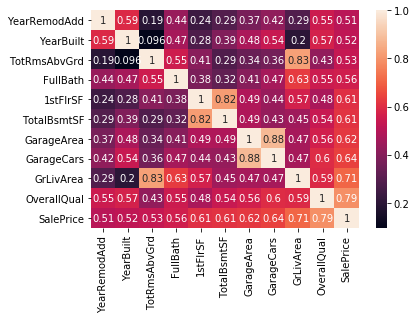

In [537]:
sns.heatmap(corr_df.corr(), annot=True)

In [538]:
df.drop('GarageArea', axis =1, inplace = True)
df.drop('TotRmsAbvGrd', axis = 1, inplace = True)

### Removing Outliers

GrLivArea is one of the most highly correlated variable with SalePrice. The correlation would be even stronger if the two extreme outliers with a low sale price but abnormally large amount of GrLivArea were removed. These two datapoints could weaken the predictions and stability of our model.

Text(0.5,1,u'GrLivArea vs. SalePrice')

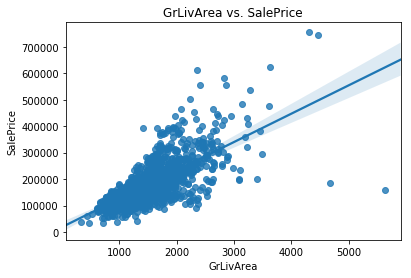

In [539]:
sns.regplot(x = 'GrLivArea', y = 'SalePrice', data = train_df).set_title('GrLivArea vs. SalePrice')

In [540]:
np.corrcoef(train_df['GrLivArea'], train_df['SalePrice'])[1,0]

0.70862447761265224

In [541]:
outlier = train_df[train_df['GrLivArea'] > 4000]
outlier = outlier[outlier['SalePrice'] < 200000]
outlier.set_index('Id', inplace = True)
outliers = outlier.index
train_df.drop([523,1298], inplace = True)
df.drop([523,1298], inplace = True)
print(outliers)

Int64Index([524, 1299], dtype='int64', name=u'Id')


Text(0.5,1,u'GrLivArea vs. SalePrice')

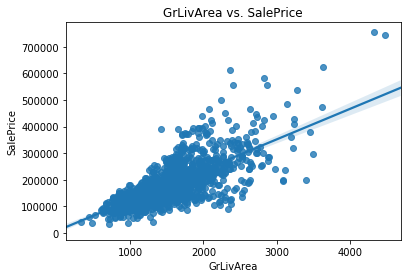

In [542]:
sns.regplot(x = 'GrLivArea', y = 'SalePrice', data = train_df).set_title('GrLivArea vs. SalePrice')

In [543]:
np.corrcoef(train_df['GrLivArea'], train_df['SalePrice'])[1,0]

0.73496816453593272

### Fixing Skewed Features

Since our target variable, SalePrice, has a skewed distribution, we will attempt to normalize it. Leaving the target variable skewed could reduce the effectiveness of our regression models. To normalize the target variable, I will apply the log + 1 fucntion.

Text(0.5,1,u'Normalized SalePrice Distribution')

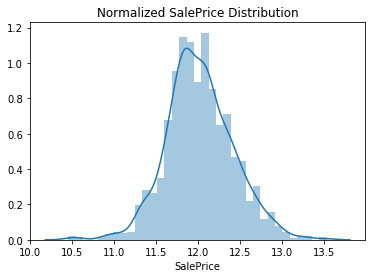

In [544]:
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])
sns.distplot(train_df['SalePrice']).set_title('Normalized SalePrice Distribution')

In our exploratory analysis, many of our features appear to have rightward skewed distributions similar to the target variable SalePrice. As a result, I will noramlize these skewed features in the same manner, by taking the log + 1 of the features. Only features that have a skew above 0.75 will be normalzied.

In [545]:
from scipy.stats import skew
numeric_feats = df.dtypes[df.dtypes != "object"].index

skewed_feats = df[numeric_feats].apply(lambda x: skew(x)) 
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

df[skewed_feats] = np.log1p(df[skewed_feats])

### Label Enconding/One Hot Encoding Categorical Variables

We need to covert categorical variables to numerical values prior to the modeling stage. Some categorical variables have important ordinal information encoded in the features values. Therefore, we must label encode these features to preserve the ordinality.

In [546]:
from sklearn.preprocessing import LabelEncoder
var= ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for v in var:
    le = LabelEncoder() 
    le.fit(list(df[v].values)) 
    df[v] = le.transform(list(df[v].values))

df.shape

(2917, 76)

One hot encode all categorical variables

In [547]:
df = pd.get_dummies(df)
df.shape

(2917, 321)

# Modeling

In [550]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler

In [551]:
X_train = df[:ntrain-2]
X_test = df[ntrain-2:]
Y_train = train_df['SalePrice']

### Model Evaluation Method 

Cross Validation method
evaluated based on RMSE (Root Mean Squared Error)

In [552]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, Y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

### Baseline Linear Regression

In [553]:
from sklearn.linear_model import LinearRegression

LinReg = LinearRegression()
score = rmse_cv(LinReg)
print("Linear Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Linear Regression score: 8939709.7273 (12357187.1031)



While linear regression models are relatively simple, effective, and interpretable models they suffer some drawbacks. Linear regression models have a few assumptions that may not be true for the dataset. First and foremost there must be a linear relationship between the independent (predictors) and dependent (target) variables. In addition, linear regression is very senstive to outliers, which effects the regression line and future forecasted values. Lastly, multiple linear regression suffers from multicolinearity, autocorellation and heteroskedascity. As we saw earlier there is a great deal of multicolinearity in our dataset which is only amplified by linear regression. Multicolinearity can increase the variance of the coefficient estimates thus making estimates very sensitive to minor changes in the model. It is also prone to overfit the data.


### Using Cross Validation to Find Optimal Hyperparameters

Our first advanced model is ridge regression regularisation. Ridge Regression is a form of regression that contrains the coefficient estimates in the model towards zero during fitting. This technique discourages learning a more complex or flexible model, to avoid the risk of overfitiing. If there is noise in the training data, then the regression coefficents wont generalize well to future data. Ridge regression uses a fitting procedure with a loss function that penalizes large coefficients and thus reduces the risk of overfitting a complex model.

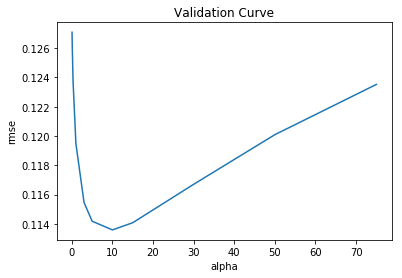

In [554]:
from sklearn.linear_model import Ridge

ridge = Ridge()

alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation Curve")
plt.xlabel("alpha")
plt.ylabel("rmse")

rr = Ridge(alpha = 5)
rr.fit(X_train_rbt, Y_train)
rr_pred = np.expm1(rr.predict(X_test))

Lasso is another method of regression regularisation. It works in a similar way to ridge regression, using a loss function to penalize large coefficient estimates, pushing or regularizing them towards zero. However, ridge regression and lasso differ in their loss functions. While ridge regression can make coefficients close to zero, lasso can force the coefficents of the least important variables to exactly zero. This essentially performs variable selection and yields a sparse model that is more interpretable. Lasso significantly reduces variance in the model without a significant increase in bias, and thus prevents overfitting. 

In [555]:
from sklearn.linear_model import LassoCV, Lasso

lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, Y_train)
coef = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables \n")

print("10 most negative coefficients \n")
print("{} \n".format(coef.sort_values().head(10)))
print("10 most positive coefficients \n")
print(coef.sort_values().tail(10))


Lasso picked 106 variables and eliminated the other 215 variables 

10 most negative coefficients 

MSZoning_C (all)        -0.275847
SaleCondition_Abnorml   -0.038873
GarageYrBlt_1965.0      -0.038737
Condition1_RRAe         -0.026944
Neighborhood_Edwards    -0.026854
SaleType_WD             -0.026141
MSZoning_RM             -0.025503
Condition1_Artery       -0.024320
Neighborhood_NWAmes     -0.022720
Foundation_BrkTil       -0.019929
dtype: float64 

10 most positive coefficients 

GarageCars              0.044880
Neighborhood_BrkSide    0.045049
OverallQual             0.052586
Neighborhood_NoRidge    0.056621
Exterior1st_BrkFace     0.065731
Neighborhood_StoneBr    0.083853
Neighborhood_Crawfor    0.089262
LotArea                 0.091687
GrLivArea               0.245622
TotalSF                 0.268782
dtype: float64


### Advanced Regression Models

In [556]:
ridge = Ridge(alpha = 10)
score = rmse_cv(ridge)
print("Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Ridge score: 0.1136 (0.0069)



In [557]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.0005))
score = rmse_cv(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Lasso score: 0.1109 (0.0069)



XG Boost is an open source gradient boosting algorithm. Gradient boosting involves ensembling a collection of regressors that are trained on the residuals error of previous regressors. At a high level the gradient boosting process is as follows: fit a model to the data, train a model to the residuals, create a new model based on the previous model and the residuals. XG Boost is much more complicated, however I will not go into detail.

In [558]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                              nthread = -1)
score = rmse_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1159 (0.0047)



### Ensembling

I will use the basic ensembling technique of averaging to leverage the strength of each individual model to create one strong model. 

In [559]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
    
        for model in self.models_:
            model.fit(X, y)

        return self
    
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [560]:
averaged_models = AveragingModels(models = (lasso, ridge, model_xgb,))

score = rmse_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1095 (0.0060)



In [561]:
averaged_models.fit(X_train, Y_train)
predictions = np.expm1(averaged_models.predict(X_test))

In [562]:
data = {'Id':test_df['Id'], 'SalePrice': predictions}
final = pd.DataFrame(data=data)
final.set_index('Id')
final.to_csv('HousePricesPredictions')

### Result

My best score was a RMSE of 0.11828 which placed me in the top 16% of entries.